# EDA of Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
%matplotlib inline

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.drop("Name",axis = 1,inplace = True)
df.drop("PassengerId",axis = 1,inplace = True)

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Finding outliers and setting bounds

In [9]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
IQR = q3 - q1
lower_fence = q1 - 1.5 * IQR
upper_fence = q3 + 1.5 * IQR

## Capping the outliers with the fence values

In [10]:
age = np.array(df["Age"])
age2 = []

for i in range(len(age)):
    if age[i] < lower_fence:
        age[i] = lower_fence
        age2.append(age[i])
    elif age[i] > upper_fence:
        age[i] = upper_fence
        age2.append(age[i])
    else:
        age2.append(age[i])
        
df["Age"] = age2

## Plotting density graph now

<Axes: ylabel='Density'>

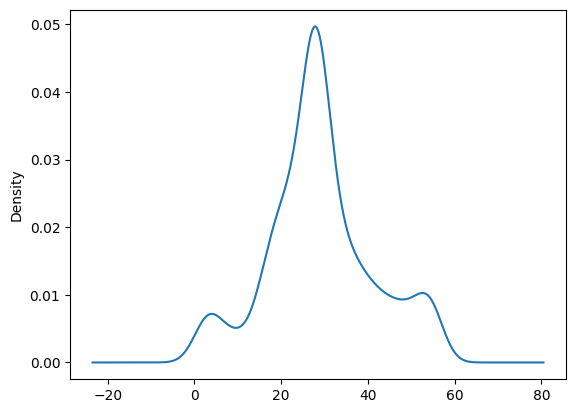

In [11]:
df['Age'].plot(kind = 'density')

<Axes: >

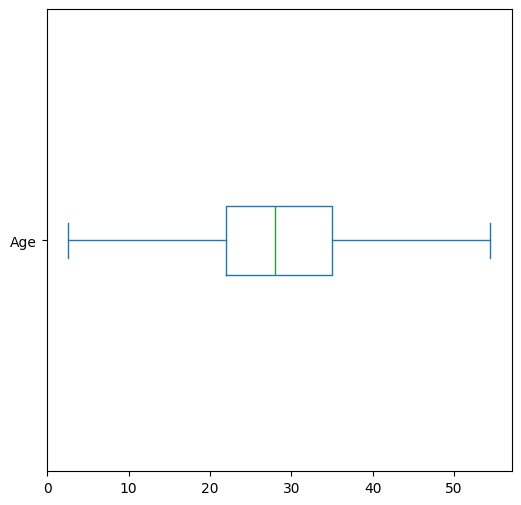

In [12]:
df["Age"].plot(kind = "box", vert = False, figsize = (6,6))

## Analysing the percentage of Live vs Dead people

Text(0.5, 0, 'Alive vs Dead')

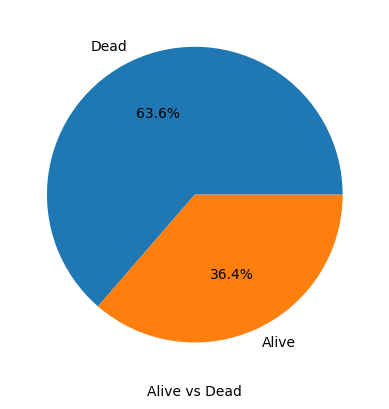

In [13]:
survivors = pd.Series([0]*266 + [1]*152) 
ax = survivors.value_counts().plot(kind = "pie",autopct='%1.1f%%',labels=["Dead", "Alive"])
ax.set_ylabel("")
ax.set_xlabel("Alive vs Dead")

In [14]:
age_group = df["Age"].value_counts()
age_group

Age
28.0    202
54.5     42
24.0     30
22.0     27
18.0     26
       ... 
20.5      1
23.5      1
53.0      1
24.5      1
34.5      1
Name: count, Length: 65, dtype: int64

## Value count of survivors w.r.t age

Text(0.5, 1.0, 'Value count of survivors w.r.t age')

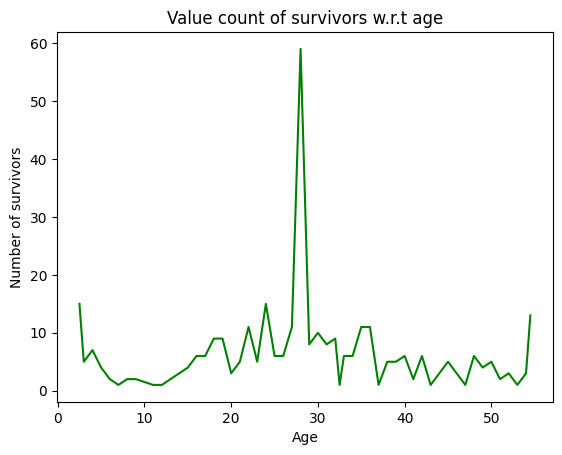

In [15]:
df3 = df[df["Survived"] == 1].groupby("Age")["Survived"].count().plot(color = "green")
df3.set_ylabel("Number of survivors")
plt.title("Value count of survivors w.r.t age")

## Plot of Survivors w.r.t age

Text(0.5, 1.0, 'Age Distribution of Survivors')

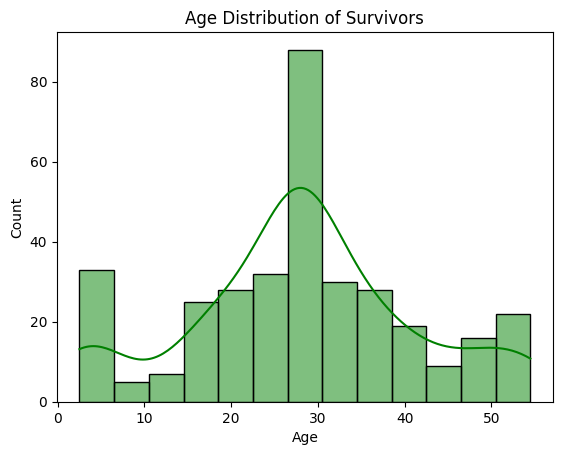

In [16]:
sns.histplot(df[df["Survived"] == 1]["Age"], kde = True, color = "Green")
plt.title('Age Distribution of Survivors')

## Plot of deaths w.r.t age

Text(0.5, 1.0, 'Age Distribution of Non-Survivors')

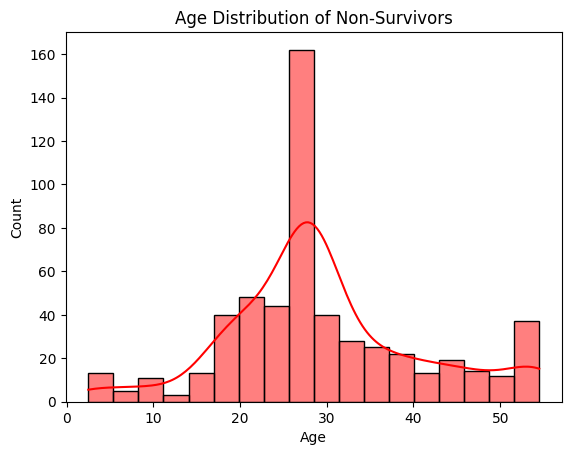

In [17]:
sns.histplot(df[df["Survived"]==0]["Age"], kde = True, color = "Red")
plt.title('Age Distribution of Non-Survivors')

## Survival and gender relationship

In [18]:
df["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

## Sex distribution of the dataset

Text(0.5, 1.0, 'Male vs Females Boarders')

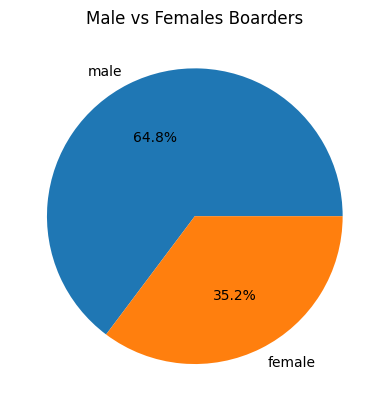

In [19]:
sex_distribution = df["Sex"].value_counts()
ax = sex_distribution.plot(kind ="pie",autopct='%1.1f%%')
ax.set_ylabel("")
plt.title("Male vs Females Boarders")

### 65% Males boarders and 35% Female boarders

In [20]:
survived_gender = df[df["Survived"]== 1]["Sex"]
survived_gender.value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival distribution upon sex')

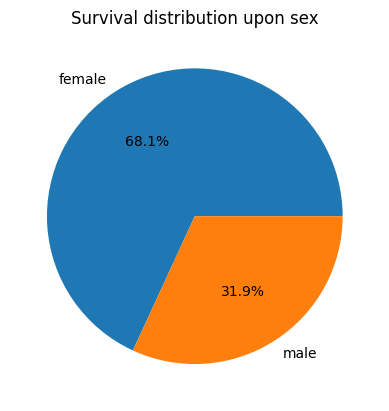

In [21]:
ax = survived_gender.value_counts().plot(kind="pie", autopct='%1.1f%%')
ax.set_ylabel("")
plt.title("Survival distribution upon sex")

### 68% Female boarders and 32% Male boarders survived

Text(0.5, 1.0, 'Gender-wise survivors according to Passenger class')

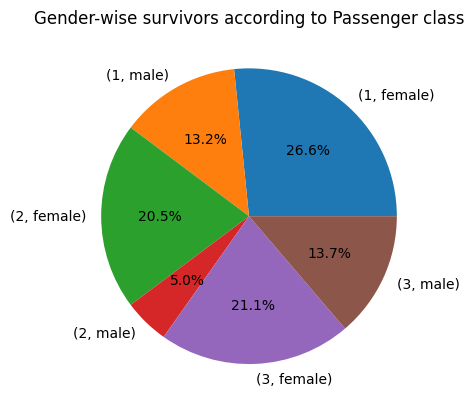

In [22]:
surviving_females_Pclass = df[df["Survived"] == 1].groupby("Pclass")["Sex"].value_counts()
ax = surviving_females_Pclass.plot(kind="pie",autopct = '%1.1f%%' )
ax.set_ylabel("")
plt.title("Gender-wise survivors according to Passenger class")

### Further breakdown of survivors according to class

Text(0.5, 1.0, 'Total Survivors according to Passenger class')

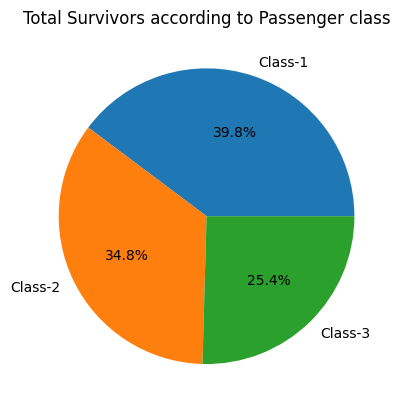

In [23]:
ax = df[df["Survived"]==1]["Pclass"].value_counts().plot(kind = "pie", autopct='%1.1f%%', labels = ["Class-1","Class-2","Class-3"] )
ax.set_ylabel("")
plt.title("Total Survivors according to Passenger class")

### Percentage survivors according to class

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Comparative graphs of sibling and parent/child w.r.t to survival

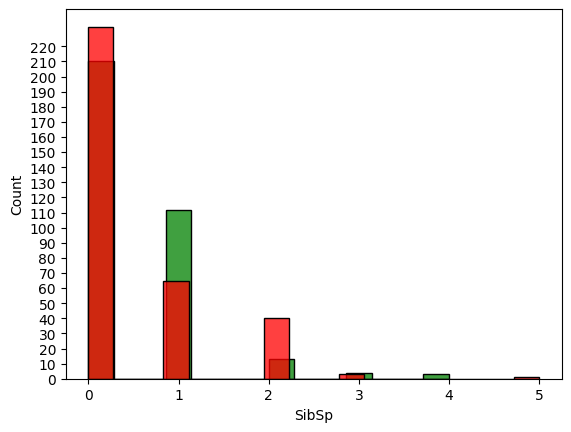

In [25]:
ax = sns.histplot(df[df["Survived"]==1]["SibSp"], color = "green")
ax.set_yticks(range(0, int(max(ax.get_yticks())) + 5, 10))

ax1 = sns.histplot(df[df["Survived"]==1]["Parch"], color = "red")
ax1.set_yticks(range(0, int(max(ax.get_yticks())) + 5, 10))

### Boarders with 0 to 1 child or relatives have greater chances of survival

## Correlation Analysis

In [58]:
df_corr = df.copy()
df_corr.drop("Sex", axis = 1, inplace = True)
df_corr.drop("Cabin", axis = 1, inplace = True)
df_corr.drop("Embarked", axis = 1, inplace = True)
df_corr.drop("Ticket", axis = 1, inplace = True)

In [59]:
corr = df_corr.corr()
df_corr

,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass_Age
0,0,3,22.0,1,0,7.2500,66.0
1,1,1,38.0,1,0,71.2833,38.0
2,1,3,26.0,0,0,7.9250,78.0
3,1,1,35.0,1,0,53.1000,35.0
4,0,3,35.0,0,0,8.0500,105.0
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,54.0
887,1,1,19.0,0,0,30.0000,19.0
888,0,3,28.0,1,2,23.4500,84.0
889,1,1,26.0,0,0,30.0000,26.0


<Axes: >

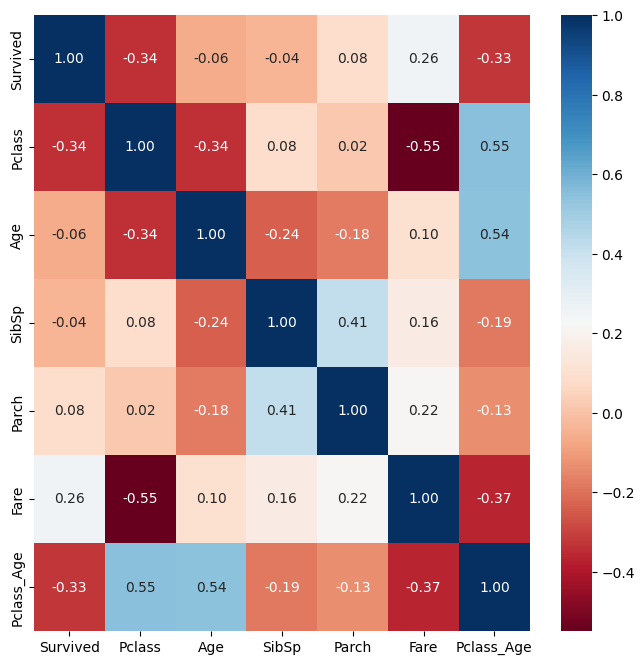

In [65]:
fig = plt.figure(figsize = (8,8))
sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")

### Negative correlations of Age/Pclass , Fare/Pclass , Survived/Pclass

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Analysing groups of passenger class w.r.t fare

In [30]:
group_by_pclass = df_corr.groupby("Pclass")["Fare"]
mean_fare = group_by_pclass.mean()
total_fare = group_by_pclass.sum()

Text(0.5, 1.0, 'Mean fare according to class')

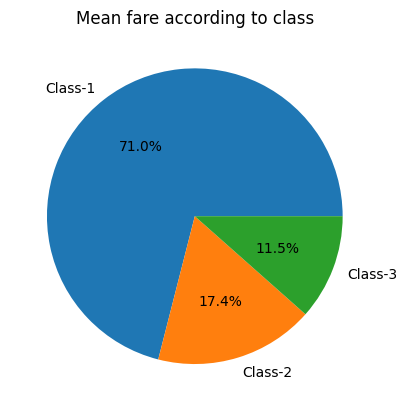

In [31]:
ax = mean_fare.plot(kind = "pie", autopct = '%1.1f%%', labels = ["Class-1","Class-2","Class-3"])
ax.set_ylabel("")
plt.title("Mean fare according to class")

### 71% of the revenue was generated from 1st class followed by 17.4% of 2nd and 11.5% of 1st

In [32]:
group_by_sex = df_corr.groupby("Pclass")["Survived"]

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df2 = df[df["Survived"] == 1].groupby("Pclass")["Sex"].value_counts().sum()
survival_rate = (df2 / 891) * 100
survival_rate

np.float64(38.38383838383838)

### Survival Rate = 38.4%

## THE END